<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/ip_practice03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Practice 3
1. Image filters
2. Edge detection
3. Character recognition

---------------
## 1. Image filters

In [ ]:
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import cv2

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/squirrel_cls.jpg

--2024-09-19 06:20:24--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.003s  

2024-09-19 06:20:24 (20.5 MB/s) - ‘messi5.jpg’ saved [72937/72937]

--2024-09-19 06:20:24--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/squirrel_cls.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62311 (61K) [image/jpeg]
Sa

Getting the path of the example image

In [ ]:
#sample_path = cbook.get_sample_data('grace_hopper.jpg').name
sample_path = "squirrel_cls.jpg"
#sample_path = "messi5.jpg"

In [ ]:
def imshow(I, title=None, axis=False):
  if len(I.shape) == 2:
    plt.imshow(I, cmap="gray")
  else:
    plt.imshow(I)

  if title is not None:
    plt.title(title)
  plt.axis(axis)

  plt.show()

(426, 535, 3)


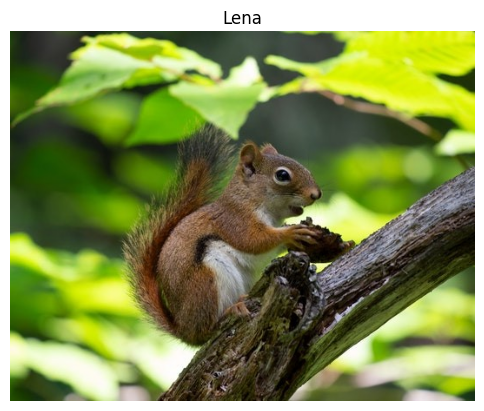

In [ ]:
I = cv2.imread(sample_path)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
print(I.shape)

imshow(I, "Lena")

### 1.1. Blurring an image with gaussian kernel

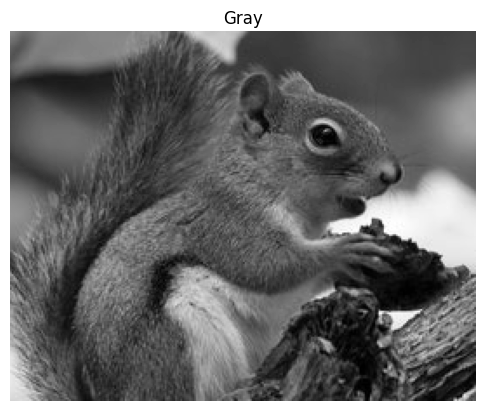

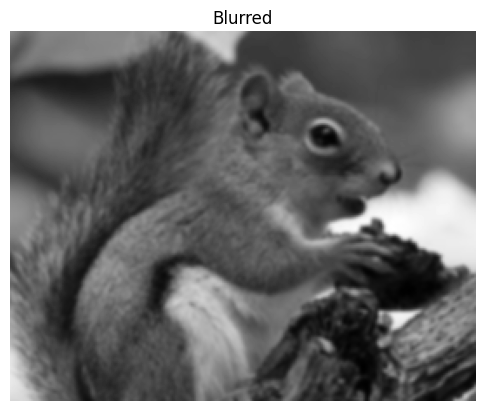

In [ ]:
gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
H, W = gray.shape

imshow(gray[H//4:-H//4, W//4:-W//4], "Gray")
blurred = cv2.GaussianBlur(gray, [5, 5], 1)
imshow(blurred[H//4:-H//4, W//4:-W//4], "Blurred")

### 1.2. Image gradients

int16


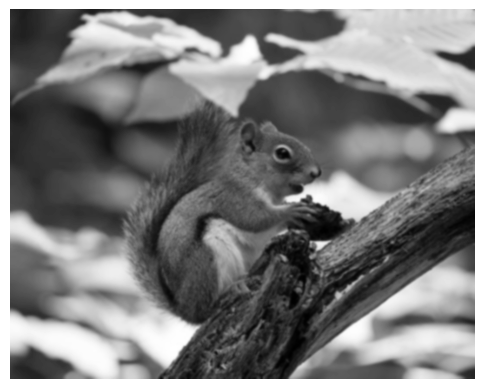

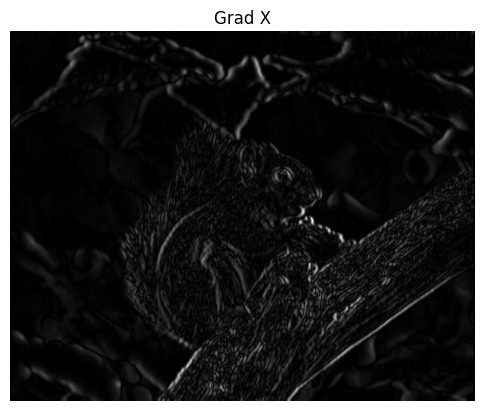

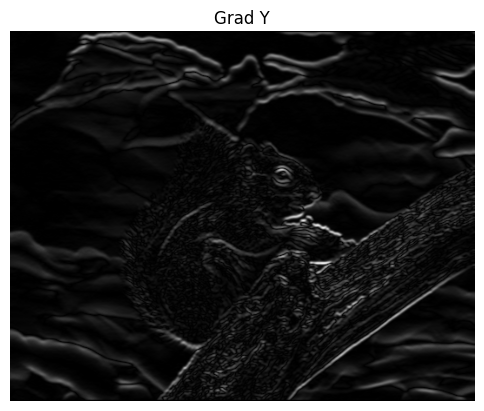

In [ ]:
blurred_float = blurred.astype(np.int16)

kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.int16)

kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.int16)

grad_x = abs(cv2.filter2D(blurred_float, -1, kernel_x))
grad_y = abs(cv2.filter2D(blurred_float, -1, kernel_y))

print(grad_x.dtype)
imshow(blurred)
imshow(grad_x, "Grad X")
imshow(grad_y, "Grad Y")

How to determine the value of the gradient?

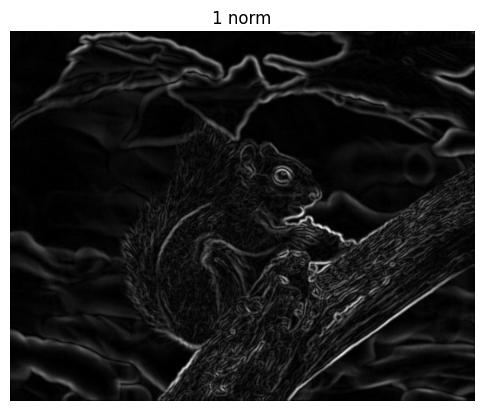

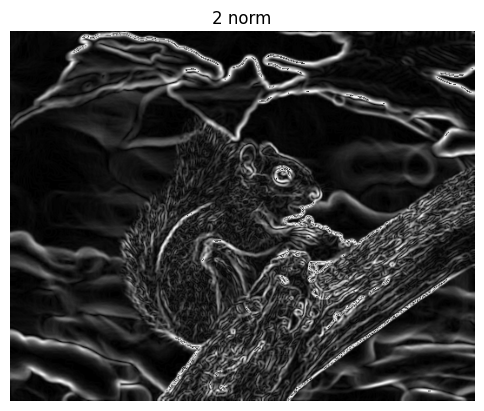

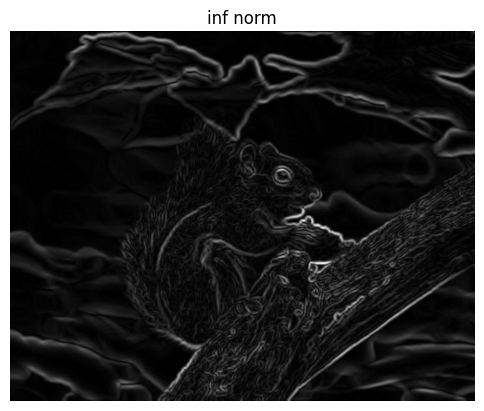

In [ ]:
grad_1 = grad_x + grad_y

grad_2 = np.sqrt(grad_x.astype(np.uint16)**2 + grad_y.astype(np.uint16)**2)

grad_inf = np.maximum(grad_x, grad_y)

imshow(grad_1 * (255/grad_1.max()), "1 norm")
imshow(grad_2 * (255/grad_2.max()), "2 norm")
imshow(grad_inf * (255/grad_inf.max()), "inf norm")

---------------------
## 2. Edge detection

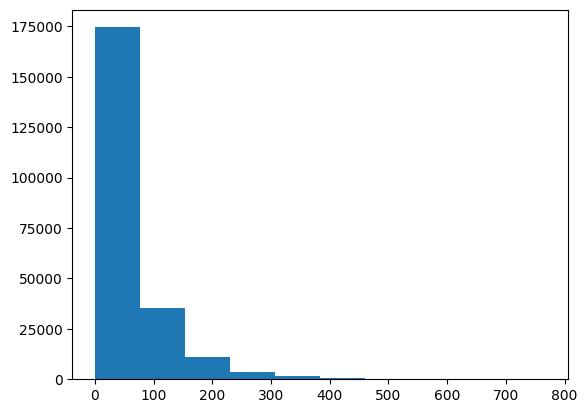

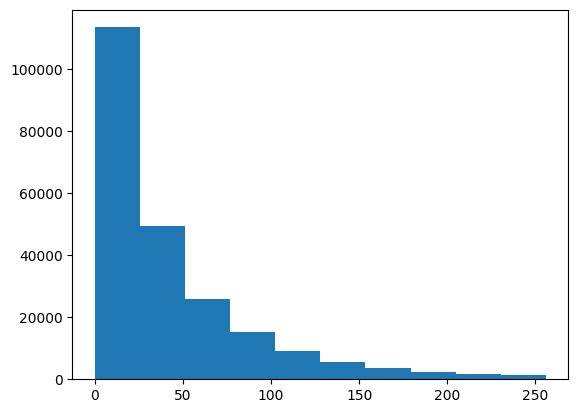

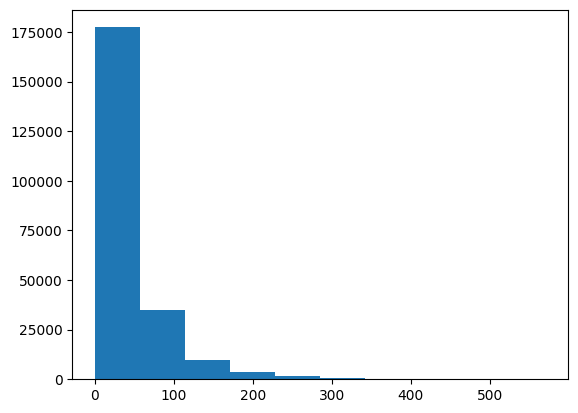

In [ ]:
plt.hist(grad_1.flatten()); plt.show()
plt.hist(grad_2.flatten()); plt.show()
plt.hist(grad_inf.flatten()); plt.show()

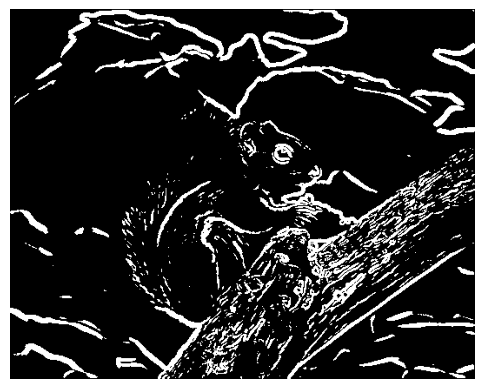

In [ ]:
edge_1 = grad_1 > 120
#otsu, edge_1 = cv2.threshold(grad_1.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imshow(edge_1)

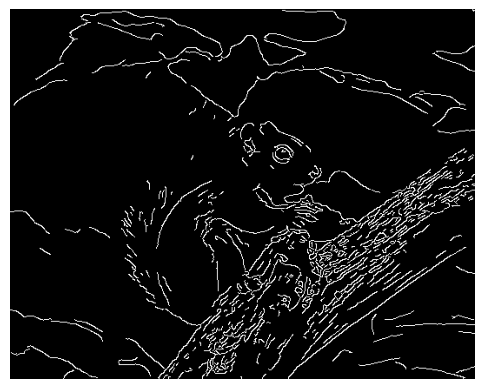

In [ ]:
lenna_canny = cv2.Canny(blurred, 100, 150)
imshow(lenna_canny)

-----------------
## 3. Character recognition with template matching

In [ ]:
!wget https://deeplearning.iit.bme.hu/Public/ImProc/document_sample1.png

--2024-09-19 07:05:10--  https://deeplearning.iit.bme.hu/Public/ImProc/document_sample1.png
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356651 (348K) [image/png]
Saving to: ‘document_sample1.png’

document_sample1.pn 100%[===================>] 348.29K   679KB/s    in 0.5s    

2024-09-19 07:05:11 (679 KB/s) - ‘document_sample1.png’ saved [356651/356651]



3300 2550


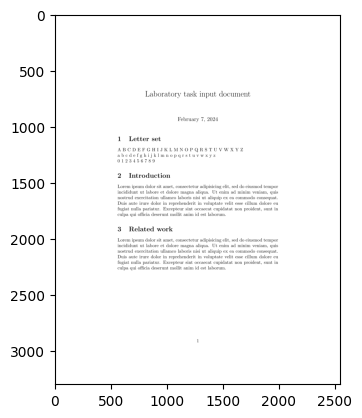

In [ ]:
doc = cv2.imread("document_sample1.png", cv2.IMREAD_GRAYSCALE)

H, W = doc.shape
print(H, W)
imshow(doc, axis=True)

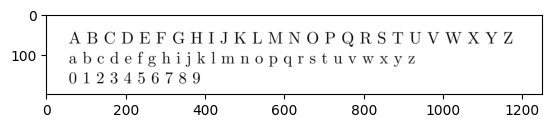

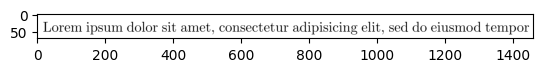

In [ ]:
ratio = 1
letters_crop = doc[1150//ratio:1350//ratio, 500//ratio:1750//ratio]
imshow(letters_crop, axis=True)

line_crop = doc[1500//ratio:1570//ratio, 540//ratio:2000//ratio]
imshow(line_crop, axis=True)

### 3.1. Extracting templates

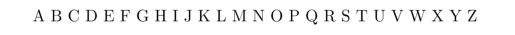

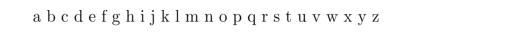

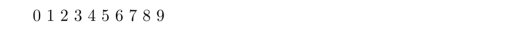

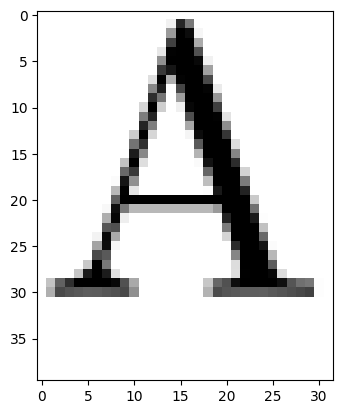

(40, 32)


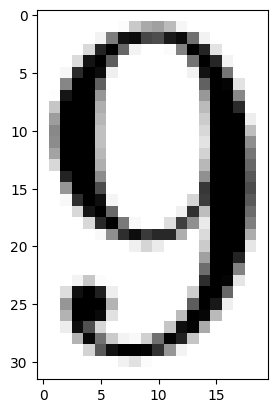

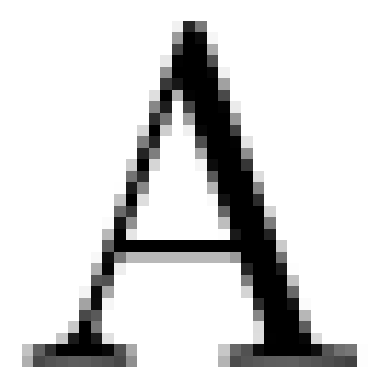

(32, 32)


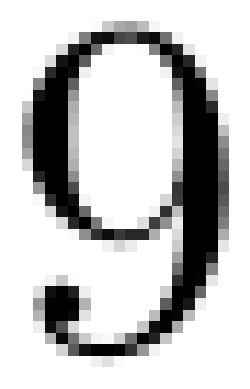

In [ ]:
charset = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z 0 1 2 3 4 5 6 7 8 9".split(" ")
letters = []

# Line separation
h, w = letters_crop.shape
line_starts = []
line_ends = []
sums = np.sum(letters_crop, axis=1)/255
start = False
for y in range(h):
    if start and (sums[y] == w):
      start = False
      line_ends.append(y+1)
    elif not start and (sums[y] < w):
      start = True
      line_starts.append(y-1)

assert len(line_starts) == len(line_ends), "Length of start and end indices are not matching!"

lines = [letters_crop[start:end] for start, end in zip(line_starts, line_ends)]
assert len(lines) == 3, "Could not separate all letter lines properly!"
imshow(lines[0])
print()
imshow(lines[1])
print()
imshow(lines[2])
print()

# Letter separation
for line in lines:
  h, w = line.shape
  sums = np.sum(line, axis=0)/255
  letter_start = 0
  started = False
  for x in range(w):
    if started and (sums[x] == h):
      started = False
      letters.append(line[:, letter_start-1:x+1])
    elif not started and (sums[x] < h):
      started = True
      letter_start = x

assert len(charset) == len(letters), "charset and letters array length mismatch!"
imshow(letters[0], axis=True)
print(letters[0].shape)
imshow(letters[-1], axis=True)


# Vertical crop
for i in range(len(letters)):
  letter = letters[i]
  h, w = letter.shape
  sums = np.sum(letter, axis=1)/255
  letter_start = 0
  started = False
  for y in range(h):
    if started and (sums[y] == w):
      started = False
      letters[i] = letter[letter_start-1:y+1, :]
    elif not started and (sums[y] < w):
      started = True
      letter_start = y
  if started:
    letters[i] = letter[letter_start:, :]

assert len(charset) == len(letters), "charset and letters array length mismatch!"
imshow(letters[0])
print(letters[0].shape)
imshow(letters[-1])

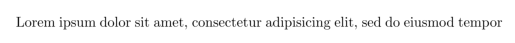

(70, 1460)
(41, 1433)


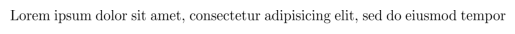

In [ ]:
imshow(line_crop)

h, w = line_crop.shape
v_sums = np.sum(line_crop, axis=0)/255
h_sums = np.sum(line_crop, axis=1)/255

found_top = False
found_bot = False
top, bot = 0, 0
i = 0
while (i < (h//2)) and not (found_top and found_bot):
  if not found_top and (h_sums[i]<w):
    found_top = True
    top = i
  if not found_bot and (h_sums[h-(i+1)]<w):
    found_bot = True
    bot = h-i
  i += 1

found_left = False
found_right = False
left, right = 0, 0
i = 0
while (i < (w//2)) and not (found_left and found_right):
  if not found_left and (v_sums[i]<h):
    found_left = True
    left = i
  if not found_right and (v_sums[w-(i+1)]<h):
    found_right = True
    right = w-i
  i += 1

line_crop2 = line_crop[top-1:bot+1, left-1:right+1]
print(line_crop.shape)
print(line_crop2.shape)
imshow(line_crop2)

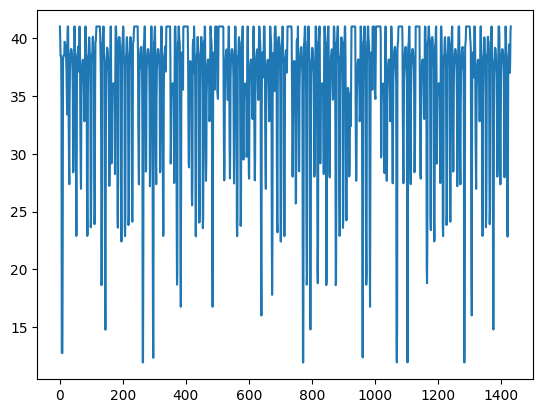

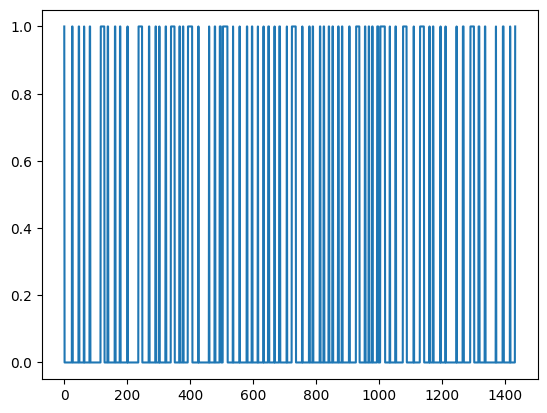

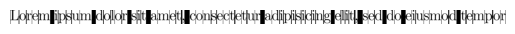

In [ ]:
h, w = line_crop2.shape
empty_columns = np.sum(line_crop2, axis=0)/255
plt.plot(empty_columns)
plt.show()

empty_columns = empty_columns == h#np.max(empty_columns)
plt.plot(empty_columns)
plt.show()

line_crop3 = line_crop2.copy()
line_crop3[:, empty_columns] = 0
imshow(line_crop3)

### 3.2. Template matching

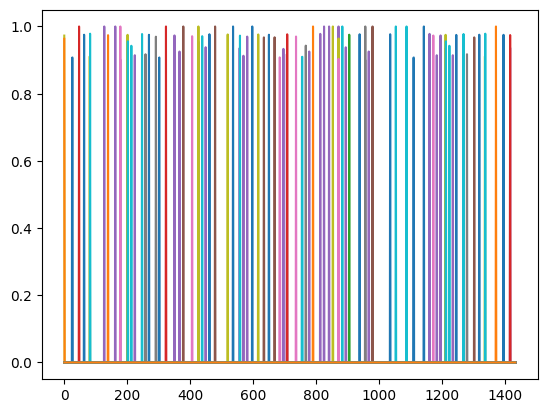

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor
Looremnipsiuimnnidloloorsitaimnietcoinisectetuuiiraddlipisicimunigeiliteddooeiuisimnniodltemnpoir


In [ ]:
threshold = 0.9
results = []
w_line = line_crop2.shape[1]
for i in range(len(letters)):
  template = letters[i]
  result = cv2.matchTemplate(line_crop2, template, cv2.TM_CCOEFF_NORMED)
  result = np.max(result, axis=0)
  w = len(result)
  result = np.concatenate([result, np.zeros(w_line-w)])
  result[result<threshold] = 0.0

  plt.plot(result)
  results.append(result)
plt.show()
results = np.stack(results)


charset = np.array(charset)
text_chars = []
mask = results > 0
indices = np.arange(len(charset))
x = 0
while x < w_line:
  #if np.max(results[:, x]) > 0:
  #  text_chars.append(charset[np.argmax(results[:, x])])
  if mask[:, x].any():
    matches = charset[indices[mask[:, x]]]
    if 'L' in matches and 'I' in matches:
      text_chars += ['L']
      x += 10
    elif 'L' in matches and 'l' in matches:
      text_chars += ['L']
      x += 10
    elif 'm' in matches and 'n' in matches:
      text_chars += ['m']
      x += 10
    else:
      text_chars += list(matches)
  x += 1


print("Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor")
print(''.join(text_chars))